<a href="https://colab.research.google.com/github/ericliudx/ISE585HW9/blob/main/ISE585HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

Power supply with Λ = 0.0031, μ = 0.2

A(t) = $\frac{0.2}{0.0031+0.2} + \frac{0.0031}{0.0031+0.2}e^{-(0.0031+0.2)t}$

A(10) = 0.986739208

Transciever with Λ = 0.01, μ = 1/3

A(t) = $\frac{1/3}{0.01 + 1/3} + \frac{0.01}{0.01 + 1/3}e^{-(0.01 + 1/3)t}$

A(10) = 0.971813956

Since these are connected in series, A(10) = 0.986739208 * 0.971813956 = 0.95893

Steady state

Power supply A = 0.98473

Transciever A = 0.97100

Total A = 0.95617

2 radar units in parallel

A(10) = 1 - (1-0.95893)*(1- 0.95893) = 0.9983132551

Steady state availability = 1-(1-0.95617)*(1-0.95617) = 0.9980789311

Difference in availability: 0.9980789311-0.95617 = 0.0419089311

Question 2

State1 = $-(Λ_1 + Λ_2)State1 + μ_1State2 + μ_2State3$

State2 = $-(\mu_1)State2 + λ_1State1$

State3 = $-(\mu_2)State3 + λ_2State1$

$\begin{aligned}
D(s)
&= s + \lambda_1 + \lambda_2
- \frac{\mu_1\lambda_1}{s+\mu_1}
- \frac{\mu_2\lambda_2}{s+\mu_2},\\[6pt]
S_1(s) &= \frac{1}{D(s)}\quad\text{(so }A(t)=\mathcal{L}^{-1}\{S_1(s)\}\text{)},\\[6pt]
\text{Let }&s_1,s_2,s_3\text{ be the roots of }D(s)=0.\\[6pt]
\boxed{\,A(t)=S_1(t)=\sum_{k=1}^3 C_k e^{s_k t}\,}
\quad\text{with}\quad
C_k=\operatorname{Res}\big(S_1(s),s_k\big)=\frac{1}{D'(s_k)}.
\end{aligned}$

$
A_{\infty}=\lim_{t\to\infty}A(t)=\frac{\mu_1\mu_2}{\mu_1\mu_2+\mu_2\lambda_1+\mu_1\lambda_2}
$

State1 = $-(\lambda_1 + \lambda_2 + \lambda_3 + \lambda_4)State1 + μ_1State2 + μ_2State3 + μ_3State4 + μ_4State5$

State2 = $-(\mu_1)State2 + λ_1State1$

State3 = $-(\mu_2)State3 + λ_2State1$

State4 = $-(\mu_3)State4 + λ_3State1$

State5 = $-(\mu_4)State5 + λ_4State1$

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

def availability(t_eval, lambdas, mus):
    """
    Compute availability A(t) for the 5-state model.

    Parameters
    ----------
    t_eval : array-like
        Times at which to evaluate availability.
    lambdas : array-like, length 4
        Failure rates λ1, λ2, λ3, λ4.
    mus : array-like, length 4
        Repair rates μ1, μ2, μ3, μ4.

    Returns
    -------
    A : array
        Availability at each time in t_eval (probability of being in State 1).
    """

    λ1, λ2, λ3, λ4 = lambdas
    μ1, μ2, μ3, μ4 = mus

    # ODE system
    def odes(t, S):
        S1, S2, S3, S4, S5 = S

        dS1 = -(λ1+λ2+λ3+λ4)*S1 + μ1*S2 + μ2*S3 + μ3*S4 + μ4*S5
        dS2 = -μ1*S2 + λ1*S1
        dS3 = -μ2*S3 + λ2*S1
        dS4 = -μ3*S4 + λ3*S1
        dS5 = -μ4*S5 + λ4*S1

        return [dS1, dS2, dS3, dS4, dS5]

    # Initial state: system starts in UP state
    S0 = [1, 0, 0, 0, 0]

    sol = solve_ivp(
        odes,
        t_span=(t_eval[0], t_eval[-1]),
        y0=S0,
        t_eval=t_eval,
        method="RK45"
    )

    # Availability is the probability of being in state 1
    return sol.y[0]


In [ ]:

lambdas = np.array([0.001, 0.0003, 0.0005, 0.0007])
mus     = np.array([0.001, 0.003, 0.005, 0.007])

t = np.linspace(0, 200, 1000)

A = availability(t, lambdas, mus)

print(A[:10])

[1.         0.99949981 0.99900024 0.9985013  0.99800297 0.99750527
 0.99700818 0.99651171 0.99601586 0.99552063]


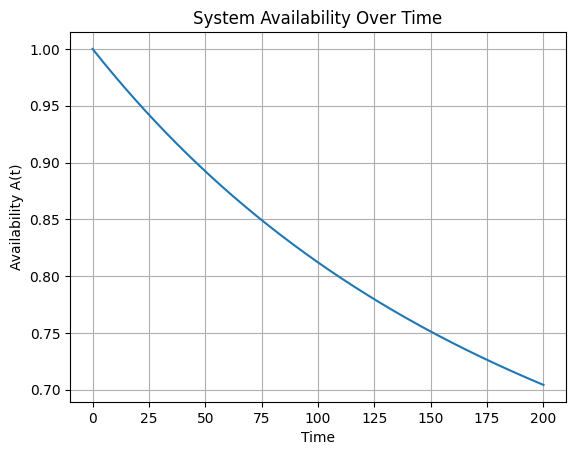

In [ ]:
import matplotlib.pyplot as plt
plt.plot(t, A)
plt.xlabel("Time")
plt.ylabel("Availability A(t)")
plt.title("System Availability Over Time")
plt.grid(True)
plt.show()

Question 3

Since it is equivalent no matter which state is the primary one and which is on standby,

State1 = $-\lambda State1 + \mu State2$

State2 = $-(\lambda + \mu)State2 + \mu State3$

State3 = $-(\lambda + \mu)State3 + \mu State4$

State4 = $-\mu State4 + \lambda State3$


Solving the balance equations gives:

$
A_{\infty}
= \frac{\mu^3 + \mu^2\lambda + \mu\lambda^2}{\mu^3 + \mu^2\lambda + \mu\lambda^2 + \lambda^3}
$

A = $\frac{125 + 50 + 20}{125 + 50 + 20 + 8} = 0.96059$

Question 4

State1 = $-(\lambda_1 + \lambda_2)State1$

State2 = $-\lambda_4 State2 + \lambda_1 State1 + \mu State4$

State3 = $-\lambda_3 State3 + \lambda_2 State1 + \mu State4$

State4 = $-2\mu State4 + \lambda_4 State2 + \lambda_3 State3$

Assuming State 1 is UP,

$A(t)=e^{-(\lambda_1+\lambda_2)t}$

The steady state availability is 0.


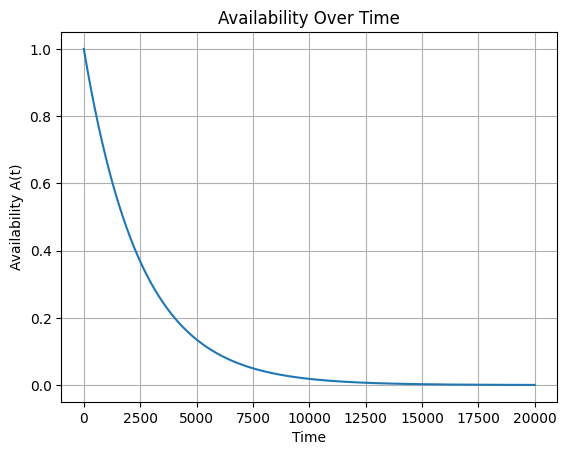

In [ ]:
lambda1 = 0.0001
lambda2 = 0.0003
lam = lambda1 + lambda2

# Time range
t = np.linspace(0, 20000, 500)

# Availability
A = np.exp(-lam * t)

# Plot
plt.plot(t, A)
plt.xlabel("Time")
plt.ylabel("Availability A(t)")
plt.title("Availability Over Time")
plt.grid(True)
plt.show()

Question 5

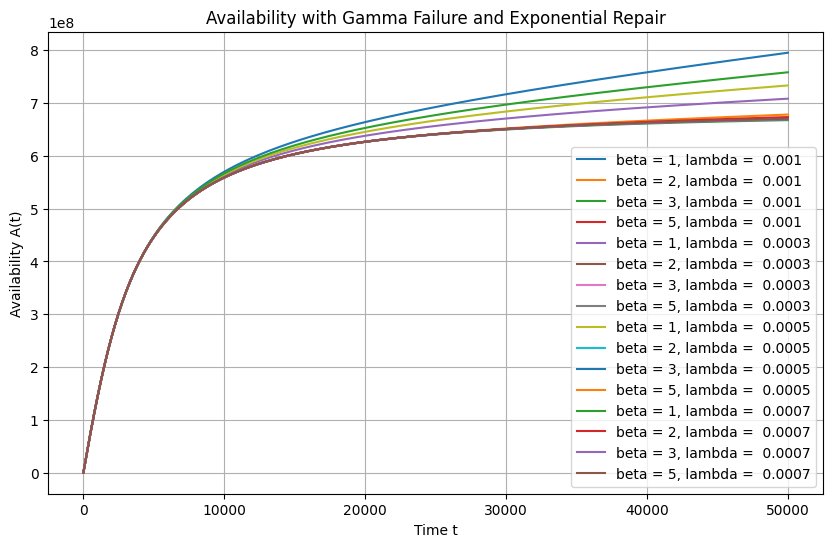

In [ ]:
def F(s, lam, beta):
    """Laplace transform of gamma failure time distribution."""
    return (lam / (lam + s))**beta

def G(s, mu):
    """Laplace transform of exponential repair distribution."""
    return mu / (mu + s)

# Availability Laplace transform:
# A(s) = (1/s) * ( G(s) / (1 - F(s)*G(s)) )

def A_s(s, lam, beta, mu):
    return (G(s, mu) / (1 - F(s, lam, beta) * G(s, mu))) / s


# -------- Numerical inverse Laplace transform (Euler method) --------

def inverse_laplace(A_s, t, lam, beta, mu, N=50):
    """Numerical inverse Laplace transform using Euler algorithm."""
    # Euler inversion parameters
    A = 20.0 / t
    sum_val = 0.0

    for k in range(N):
        s = A + k * np.pi * 1j / t
        sum_val += (2 - (k == 0)) * A_s(s, lam, beta, mu).real

    return (np.exp(A * t) / t) * (np.pi / 2) * sum_val


# -------- Plot availability --------

def plot_availability(lam, mu, betas):
    t = np.linspace(0.01, 50000, 200)

    plt.figure(figsize=(10, 6))
    for lam in lambdas:
      for beta in betas:
          A_vals = [inverse_laplace(A_s, ti, lam, beta, mu) for ti in t]
          plt.plot(t, A_vals, label=f"beta = {beta}, lambda =  {lam}")

    plt.xlabel("Time t")
    plt.ylabel("Availability A(t)")
    plt.title("Availability with Gamma Failure and Exponential Repair")
    plt.grid(True)
    plt.legend()
    plt.show()


# Example usage
plot_availability(lam=[0.1, 0.05, 0.01], mu=0.05, betas=[1, 2, 3, 5])